# Project : Spam Classifier

In [1]:
# import the necessary packages.
from os import walk
from os.path import join

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from bs4 import BeautifulSoup
from wordcloud import WordCloud
from PIL import Image
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

%matplotlib inline

In [2]:
EXAMPLE_FILE = 'SpamData/01_Processing/practice_email.txt'

SPAM_1_PATH = 'SpamData/01_Processing/spam_assassin_corpus/spam_1'
SPAM_2_PATH = 'SpamData/01_Processing/spam_assassin_corpus/spam_2'

EASY_NONSPAM_1_PATH = 'SpamData/01_Processing/spam_assassin_corpus/easy_ham_1'
EASY_NONSPAM_2_PATH = 'SpamData/01_Processing/spam_assassin_corpus/easy_ham_2'

In [3]:
SPAM_CAT = 1
HAM_CAT = 0
VOCAB_SIZE = 2500

In [4]:
WORD_ID_FILE = 'SpamData/01_Processing/word-by-id.csv'

TRAINING_DATA_FILE = 'SpamData/02_Training/train-data.txt'
TEST_DATA_FILE = 'SpamData/02_Training/test-data.txt'

WHALE_FILE = 'SpamData/01_Processing/wordcloud_resources/whale-icon.png'
SKULL_FILE = 'SpamData/01_Processing/wordcloud_resources/skull-icon.png'
THUMBS_UP_FILE = 'SpamData/01_Processing/wordcloud_resources/thumbs-up.png'
THUMBS_DOWN_FILE = 'SpamData/01_Processing/wordcloud_resources/thumbs-down.png'
CUSTOM_FONT_FILE = 'SpamData/01_Processing/wordcloud_resources/OpenSansCondensed-Bold.ttf'

In [5]:
TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-nonspam.txt'

TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob-all-tokens.txt'

TEST_FEATURE_MATRIX = 'SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt'

In [6]:
# Read the file
df = open(EXAMPLE_FILE , encoding = 'latin-1')
m = df.read()
df.close()

In [7]:
import sys
sys.getfilesystemencoding()

'utf-8'

In [8]:
print(m)

From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002
Return-Path: <exmh-workers-admin@spamassassin.taint.org>
Delivered-To: zzzz@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36
	for <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)
Received: from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for
    <zzzz-exmh@spamassassin.taint.org>; Thu, 22 Aug 2002 12:34:53 +0100
Received: from listman.spamassassin.taint.org (localhost.localdomain [127.0.0.1]) by
    listman.redhat.com (Postfix) with ESMTP id 8386540858; Thu, 22 Aug 2002
    07:35:02 -0400 (EDT)
Delivered-To: exmh-workers@listman.spamassassin.taint.org
Received: from int-mx1.corp

#### Delete the header and take only the email body part.

In [9]:
stream = open(EXAMPLE_FILE, encoding='latin-1')

is_body = False
lines = []

for line in stream:
    if is_body:
        lines.append(line)
    elif line == '\n':
        is_body = True

stream.close()

email_body = '\n'.join(lines)
print(lines)


['\n', 'Dear Mr Still\n', '\n', 'Good tidings to you and all your staff for the festive season ahead (Christmas).\n', 'Now to the crux of the matter-in-hand: I am a fully qualified Santa Claus and am wondering whether you might consider me to run my own "Santa\'s Grotto" in your store.\n', 'But WAIT! You\'re probably thinking: "What makes him so special?"\n', 'Well, first of all, I have made several changes to the characterisation of Father Christmas. Rather than greeting the children with shouts of "Ho, ho, ho!" I prefer to whisper the phrase "Dependence is not unfathomable in this cruel world we live in". In addition, my gifts are ALL hand-made, ranging from felt hoops to vanilla-pod holders.\n', 'You will note also, from the enclosed sketch, that I have radically redesigned Santa\'s outfit and have renamed my character "Lord Buckles". Would you be interested in employing me? I promise NEVER to let you down.\n', 'I look forward to hearing from you.\n', '\n', 'Best wishes\n', 'Robin C

In [10]:
email_body = '\n'.join(lines)
print(email_body)



Dear Mr Still



Good tidings to you and all your staff for the festive season ahead (Christmas).

Now to the crux of the matter-in-hand: I am a fully qualified Santa Claus and am wondering whether you might consider me to run my own "Santa's Grotto" in your store.

But WAIT! You're probably thinking: "What makes him so special?"

Well, first of all, I have made several changes to the characterisation of Father Christmas. Rather than greeting the children with shouts of "Ho, ho, ho!" I prefer to whisper the phrase "Dependence is not unfathomable in this cruel world we live in". In addition, my gifts are ALL hand-made, ranging from felt hoops to vanilla-pod holders.

You will note also, from the enclosed sketch, that I have radically redesigned Santa's outfit and have renamed my character "Lord Buckles". Would you be interested in employing me? I promise NEVER to let you down.

I look forward to hearing from you.



Best wishes

Robin Cooper

[Excerpt from the book: The Timewaster Let

## Generator Function

In [11]:
def generate_squares(N):
    for my_number in range(N):
        yield my_number ** 2

In [12]:
for i in generate_squares(100):
    print(i, end=' ->')

0 ->1 ->4 ->9 ->16 ->25 ->36 ->49 ->64 ->81 ->100 ->121 ->144 ->169 ->196 ->225 ->256 ->289 ->324 ->361 ->400 ->441 ->484 ->529 ->576 ->625 ->676 ->729 ->784 ->841 ->900 ->961 ->1024 ->1089 ->1156 ->1225 ->1296 ->1369 ->1444 ->1521 ->1600 ->1681 ->1764 ->1849 ->1936 ->2025 ->2116 ->2209 ->2304 ->2401 ->2500 ->2601 ->2704 ->2809 ->2916 ->3025 ->3136 ->3249 ->3364 ->3481 ->3600 ->3721 ->3844 ->3969 ->4096 ->4225 ->4356 ->4489 ->4624 ->4761 ->4900 ->5041 ->5184 ->5329 ->5476 ->5625 ->5776 ->5929 ->6084 ->6241 ->6400 ->6561 ->6724 ->6889 ->7056 ->7225 ->7396 ->7569 ->7744 ->7921 ->8100 ->8281 ->8464 ->8649 ->8836 ->9025 ->9216 ->9409 ->9604 ->9801 ->

### Email Body Extraction

In [13]:
def email_body_generator(path):
    
    for root, dirnames, filenames in walk(path):
        for file_name in filenames:
            
            filepath = join(root, file_name)
            
            stream = open(filepath, encoding='latin-1')

            is_body = False
            lines = []

            for line in stream:
                if is_body:
                    lines.append(line)
                    
                elif line == '\n':
                    is_body = True

            stream.close()

            email_body = '\n'.join(lines)
            
            yield file_name, email_body

In [14]:
def df_from_directory(path, classification):
    rows = []
    row_names = []
    
    for file_name, email_body in email_body_generator(path):
        rows.append({'MESSAGE': email_body, 'CATEGORY': classification})
        row_names.append(file_name)
        
    return pd.DataFrame(rows, index=row_names)

#### Adding all the spam emails

In [15]:
spam_emails = df_from_directory(SPAM_1_PATH , 1)
spam_emails.head()

,MESSAGE,CATEGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1


In [16]:
spam_emails = spam_emails.append(df_from_directory(SPAM_2_PATH, 1))
spam_emails.head(15)

,MESSAGE,CATEGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1
00006.5ab5620d3d7c6c0db76234556a16f6c1,A POWERHOUSE GIFTING PROGRAM You Don't Want To...,1
00007.d8521faf753ff9ee989122f6816f87d7,Help wanted. We are a 14 year old fortune 500...,1
00008.dfd941deb10f5eed78b1594b131c9266,<html>\n\n<head>\n\n<title>ReliaQuote - Save U...,1
00009.027bf6e0b0c4ab34db3ce0ea4bf2edab,TIRED OF THE BULL OUT THERE?\n\nWant To Stop L...,1
00010.445affef4c70feec58f9198cfbc22997,"Dear ricardo1 ,\n\n\n\n<html>\n\n<body>\n\n<ce...",1


In [17]:
spam_emails = df_from_directory(SPAM_1_PATH, 1)
spam_emails = spam_emails.append(df_from_directory(SPAM_2_PATH, 1))
spam_emails.head()

,MESSAGE,CATEGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1


In [18]:
spam_emails.shape

(1898, 2)

In [19]:
spam_emails.isnull().sum()

MESSAGE     0
CATEGORY    0
dtype: int64

In [20]:
spam_emails.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1898 entries, 00001.7848dde101aa985090474a91ec93fcf0 to cmds
Data columns (total 2 columns):
MESSAGE     1898 non-null object
CATEGORY    1898 non-null int64
dtypes: int64(1), object(1)
memory usage: 44.5+ KB


#### Adding all the Ham emails

In [21]:
ham_emails = df_from_directory(EASY_NONSPAM_1_PATH, HAM_CAT)
ham_emails = ham_emails.append(df_from_directory(EASY_NONSPAM_2_PATH, HAM_CAT))
ham_emails.head()

,MESSAGE,CATEGORY
00001.7c53336b37003a9286aba55d2945844c,"Date: Wed, 21 Aug 2002 10:54:46 -05...",0
00002.9c4069e25e1ef370c078db7ee85ff9ac,"Martin A posted:\n\nTassos Papadopoulos, the G...",0
00003.860e3c3cee1b42ead714c5c874fe25f7,Man Threatens Explosion In Moscow \n\n\n\nThur...,0
00004.864220c5b6930b209cc287c361c99af1,Klez: The Virus That Won't Die\n\n \n\nAlready...,0
00005.bf27cdeaf0b8c4647ecd61b1d09da613,"> in adding cream to spaghetti carbonara, whi...",0


In [22]:
ham_emails.shape

(3901, 2)

In [23]:
ham_emails.isnull().sum()

MESSAGE     0
CATEGORY    0
dtype: int64

In [24]:
# Concat both ham and spam emails
dataset = pd.concat([spam_emails , ham_emails])

In [25]:
dataset.head(20)

,MESSAGE,CATEGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1
00006.5ab5620d3d7c6c0db76234556a16f6c1,A POWERHOUSE GIFTING PROGRAM You Don't Want To...,1
00007.d8521faf753ff9ee989122f6816f87d7,Help wanted. We are a 14 year old fortune 500...,1
00008.dfd941deb10f5eed78b1594b131c9266,<html>\n\n<head>\n\n<title>ReliaQuote - Save U...,1
00009.027bf6e0b0c4ab34db3ce0ea4bf2edab,TIRED OF THE BULL OUT THERE?\n\nWant To Stop L...,1
00010.445affef4c70feec58f9198cfbc22997,"Dear ricardo1 ,\n\n\n\n<html>\n\n<body>\n\n<ce...",1


In [26]:
dataset.tail()

,MESSAGE,CATEGORY
01396.61983fbe6ec43f55fd44e30fce24ffa6,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7,"> >-- be careful when using this one.) Also, t...",0
01398.169b51731fe569f42169ae8f948ec676,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0
01400.f897f0931e461e7b2e964d28e927c35e,"Hi there,\n\n\n\nNow this is probably of no us...",0


In [27]:
dataset.shape

(5799, 2)

## Data Cleaning

In [28]:
dataset['MESSAGE'].value_counts()

\n\nHello I am your hot lil horny toy.\n\n    I am the one you dream About,\n\n    I am a very open minded person,\n\n    Love to talk about and any subject.\n\n\n\n\n\n    Fantasy is my way of life, \n\n    Ultimate in sex play.\n\n\n\n     Ummmmmmmmmmmmmm\n\n     I am Wet and ready for you.\n\n\n\n     It is not your looks but your imagination that matters most,\n\n     With My sexy voice I can make your dream come true...\n\n  \n\n     Hurry Up! call me let me Cummmmm for you..........................\n\n\n\n\n\nTOLL-FREE:             1-877-451-TEEN (1-877-451-8336)\n\n\n\nFor phone billing:     1-900-993-2582\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n-- \n\n_______________________________________________\n\nSign-up for your own FREE Personalized E-mail at Mail.com\n\nhttp://www.mail.com/?sr=signup\n\n\n             

In [29]:
dataset.MESSAGE

00001.7848dde101aa985090474a91ec93fcf0    <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Tr...
00002.d94f1b97e48ed3b553b3508d116e6a09    1) Fight The Risk of Cancer!\n\nhttp://www.adc...
00003.2ee33bc6eacdb11f38d052c44819ba6c    1) Fight The Risk of Cancer!\n\nhttp://www.adc...
00004.eac8de8d759b7e74154f142194282724    ##############################################...
00005.57696a39d7d84318ce497886896bf90d    I thought you might like these:\n\n1) Slim Dow...
                                                                ...                        
01396.61983fbe6ec43f55fd44e30fce24ffa6    http://news.bbc.co.uk/1/hi/england/2515127.stm...
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7    > >-- be careful when using this one.) Also, t...
01398.169b51731fe569f42169ae8f948ec676    >>>>> "SM" == Skip Montanaro <skip@pobox.com> ...
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896    So then, "Mark Hammond" <mhammond@skippinet.co...
01400.f897f0931e461e7b2e964d28e927c35e    Hi there,\n\n\n\nNow this is probably 

In [30]:
dataset['MESSAGE'].isnull().values.any()

False

There is no missing values.

In [31]:
dataset['CATEGORY'].value_counts()

0    3901
1    1898
Name: CATEGORY, dtype: int64

Spam emails size is less than 50%.

In [32]:
dataset.MESSAGE.str.len()

00001.7848dde101aa985090474a91ec93fcf0    3966
00002.d94f1b97e48ed3b553b3508d116e6a09     820
00003.2ee33bc6eacdb11f38d052c44819ba6c     669
00004.eac8de8d759b7e74154f142194282724    3004
00005.57696a39d7d84318ce497886896bf90d     687
                                          ... 
01396.61983fbe6ec43f55fd44e30fce24ffa6    1221
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7     620
01398.169b51731fe569f42169ae8f948ec676    3244
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896     804
01400.f897f0931e461e7b2e964d28e927c35e    4143
Name: MESSAGE, Length: 5799, dtype: int64

In [33]:
dataset.MESSAGE.str.len() == 0

00001.7848dde101aa985090474a91ec93fcf0    False
00002.d94f1b97e48ed3b553b3508d116e6a09    False
00003.2ee33bc6eacdb11f38d052c44819ba6c    False
00004.eac8de8d759b7e74154f142194282724    False
00005.57696a39d7d84318ce497886896bf90d    False
                                          ...  
01396.61983fbe6ec43f55fd44e30fce24ffa6    False
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7    False
01398.169b51731fe569f42169ae8f948ec676    False
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896    False
01400.f897f0931e461e7b2e964d28e927c35e    False
Name: MESSAGE, Length: 5799, dtype: bool

In [34]:
# check if there are empty emails (string length zero)
(dataset.MESSAGE.str.len() == 0).any()

True

In [35]:
(dataset.MESSAGE.str.len() == 0).sum()

3

There are some empty emails somewhere in the dataframe.Among the 5799 entries only 3 rows are empty.

In [36]:
dataset.isnull().sum()

MESSAGE     0
CATEGORY    0
dtype: int64

#### Now locate the empty emails which rows are empty.

In [37]:
type(dataset.MESSAGE.str.len() == 0)

pandas.core.series.Series

In [38]:
dataset[dataset.MESSAGE.str.len() == 0].index

Index(['cmds', 'cmds', 'cmds'], dtype='object')

In [39]:
dataset.MESSAGE.index.get_loc('cmds')

array([False, False, False, ..., False, False, False])

#### Drop the 'cmds' rows from the dataset.

In [40]:
dataset.drop([
    'cmds'
] , inplace = True)

In [41]:
dataset[dataset.MESSAGE.str.len() == 0].index

Index([], dtype='object')

In [42]:
dataset.shape

(5796, 2)

4 rows is deleted.

In [43]:
#Add ID column for each row.
document_ids = range(0, len(dataset.index))
dataset['ID'] = document_ids

In [44]:
dataset.shape

(5796, 3)

In [45]:
dataset.ID

00001.7848dde101aa985090474a91ec93fcf0       0
00002.d94f1b97e48ed3b553b3508d116e6a09       1
00003.2ee33bc6eacdb11f38d052c44819ba6c       2
00004.eac8de8d759b7e74154f142194282724       3
00005.57696a39d7d84318ce497886896bf90d       4
                                          ... 
01396.61983fbe6ec43f55fd44e30fce24ffa6    5791
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7    5792
01398.169b51731fe569f42169ae8f948ec676    5793
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896    5794
01400.f897f0931e461e7b2e964d28e927c35e    5795
Name: ID, Length: 5796, dtype: int32

In [46]:
dataset.head(10)

,MESSAGE,CATEGORY,ID
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,0
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,2
00004.eac8de8d759b7e74154f142194282724,##############################################...,1,3
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1,4
00006.5ab5620d3d7c6c0db76234556a16f6c1,A POWERHOUSE GIFTING PROGRAM You Don't Want To...,1,5
00007.d8521faf753ff9ee989122f6816f87d7,Help wanted. We are a 14 year old fortune 500...,1,6
00008.dfd941deb10f5eed78b1594b131c9266,<html>\n\n<head>\n\n<title>ReliaQuote - Save U...,1,7
00009.027bf6e0b0c4ab34db3ce0ea4bf2edab,TIRED OF THE BULL OUT THERE?\n\nWant To Stop L...,1,8
00010.445affef4c70feec58f9198cfbc22997,"Dear ricardo1 ,\n\n\n\n<html>\n\n<body>\n\n<ce...",1,9


In [47]:
dataset['File_Name'] = dataset.index
dataset.head()

,MESSAGE,CATEGORY,ID,File_Name
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,0,00001.7848dde101aa985090474a91ec93fcf0
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,1,00002.d94f1b97e48ed3b553b3508d116e6a09
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,2,00003.2ee33bc6eacdb11f38d052c44819ba6c
00004.eac8de8d759b7e74154f142194282724,##############################################...,1,3,00004.eac8de8d759b7e74154f142194282724
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1,4,00005.57696a39d7d84318ce497886896bf90d


In [48]:
dataset.set_index('ID' , inplace = True)
dataset.head()

,MESSAGE,CATEGORY,File_Name
ID,,,
0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,00001.7848dde101aa985090474a91ec93fcf0
1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00002.d94f1b97e48ed3b553b3508d116e6a09
2,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00003.2ee33bc6eacdb11f38d052c44819ba6c
3,##############################################...,1,00004.eac8de8d759b7e74154f142194282724
4,I thought you might like these:\n\n1) Slim Dow...,1,00005.57696a39d7d84318ce497886896bf90d


In [49]:
dataset.tail()

,MESSAGE,CATEGORY,File_Name
ID,,,
5791,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0,01396.61983fbe6ec43f55fd44e30fce24ffa6
5792,"> >-- be careful when using this one.) Also, t...",0,01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7
5793,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0,01398.169b51731fe569f42169ae8f948ec676
5794,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0,01399.ca6b00b7b341bbde9a9ea3dd6a7bf896
5795,"Hi there,\n\n\n\nNow this is probably of no us...",0,01400.f897f0931e461e7b2e964d28e927c35e


#### Save the file in jason format.

In [50]:
# create a jason file with the data
DATA_JSON_FILE = 'SpamData/01_Processing/email-text-data.json'
dataset.to_json(DATA_JSON_FILE)

## Visualized

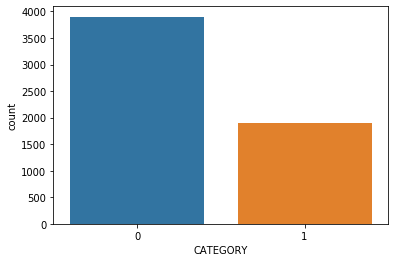

In [51]:
sns.countplot(x = 'CATEGORY' , data = dataset)

In [52]:
amnt_ham = dataset.CATEGORY.value_counts()[0]
amnt_spam = dataset.CATEGORY.value_counts()[1]

In [53]:
amnt_ham

3900

In [54]:
amnt_spam

1896

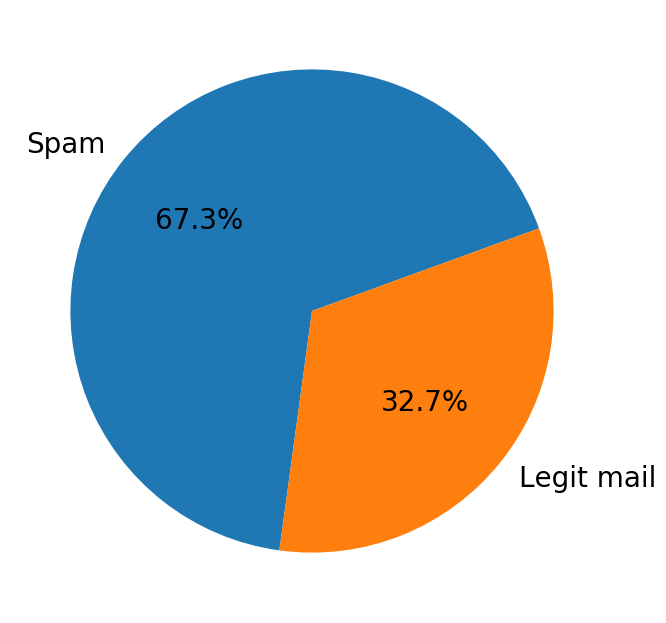

In [55]:
category_names = ['Spam' , 'Legit mail']
sizes = [amnt_ham , amnt_spam]

plt.figure(figsize = (10,8) , dpi=100)
plt.pie(sizes , labels = category_names , textprops={'fontsize': 20} , startangle=20, 
       autopct='%1.1f%%')
plt.show()

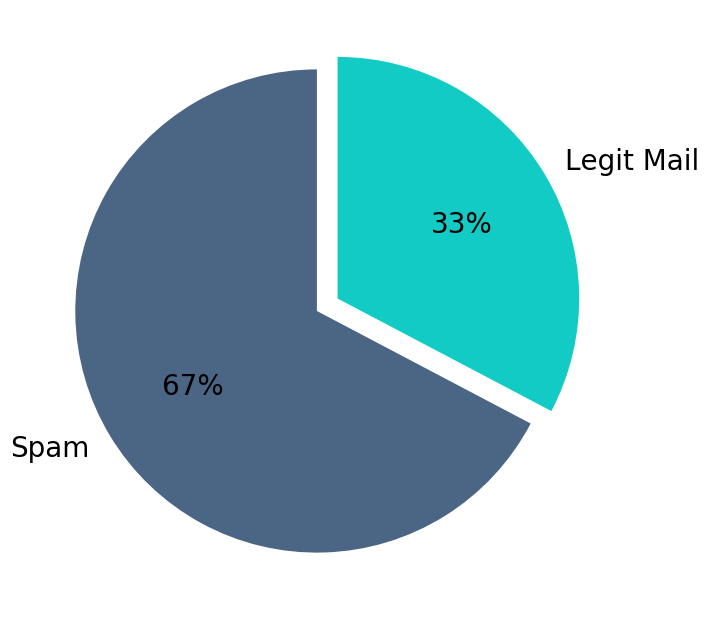

In [56]:
category_names = ['Spam', 'Legit Mail']
sizes = [amnt_ham, amnt_spam]
custom_colours = ['#4b6584', '#12CBC4']

plt.figure(figsize = (10,8) , dpi=100)
plt.pie(sizes, labels=category_names , textprops={'fontsize': 20} , startangle = 90 , 
       autopct='%1.0f%%' , colors=custom_colours , explode=[0 , 0.1])
plt.show()

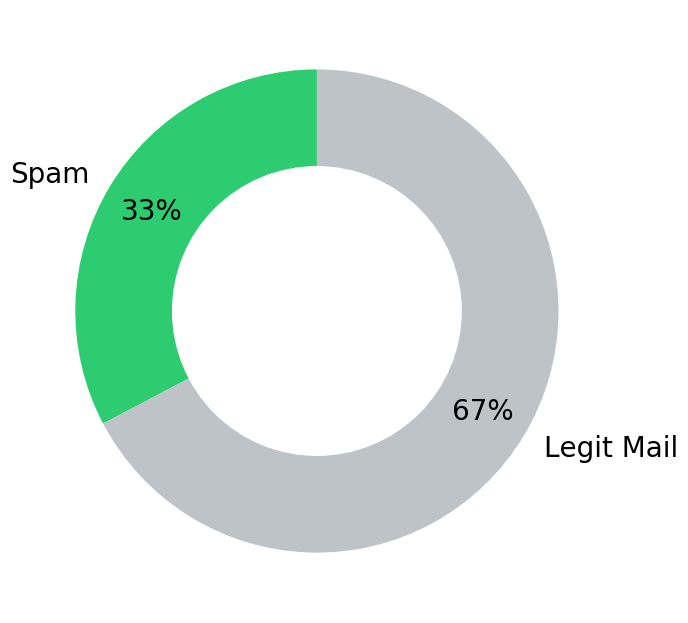

In [57]:
category_names = ['Spam', 'Legit Mail']
sizes = [amnt_spam, amnt_ham]
custom_colours = ['#2ecc71', '#bdc3c7']

plt.figure(figsize = (10,8) , dpi=100)
plt.pie(sizes , labels = category_names , textprops={'fontsize': 20} , startangle=90 , 
       autopct='%1.0f%%' , colors=custom_colours , pctdistance=0.8)

# draw circle
centre_circle = plt.Circle((0, 0) , radius=0.6 , fc = 'white')
plt.gca().add_artist(centre_circle)

plt.show()

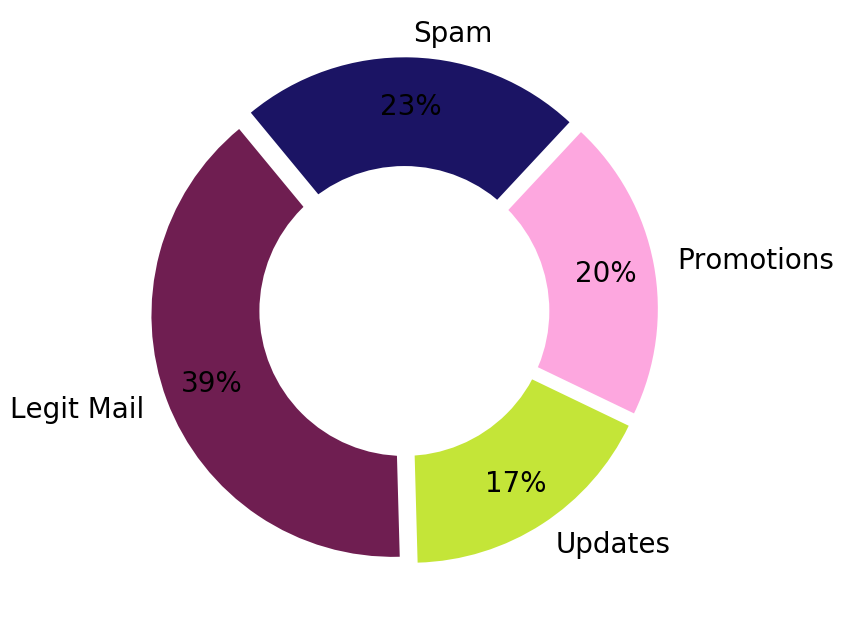

In [58]:
category_names = ['Spam', 'Legit Mail', 'Updates', 'Promotions']
sizes = [25, 43, 19, 22]
custom_colours = ['#1B1464', '#6F1E51', '#C4E538', '#FDA7DF']
offset = [0.05, 0.05, 0.05, 0.05]


plt.figure(figsize = (10,8) , dpi=100)
plt.pie(sizes, labels=category_names, textprops={'fontsize': 20}, startangle=47, 
       autopct='%1.0f%%', colors=custom_colours, pctdistance=0.8, explode=offset)

# draw circle
centre_circle = plt.Circle((0, 0), radius=0.6, fc='white')
plt.gca().add_artist(centre_circle)

plt.show()

## Natural Language Processing

### Download NLTK resources.

In [59]:
nltk.download('punkt');

[nltk_data] Downloading package punkt to C:\Users\Mahmudur
[nltk_data]     Limon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [60]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Mahmudur
[nltk_data]     Limon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [61]:
nltk.download('gutenberg')
nltk.download('shakespeare')

[nltk_data] Downloading package gutenberg to C:\Users\Mahmudur
[nltk_data]     Limon\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package shakespeare to C:\Users\Mahmudur
[nltk_data]     Limon\AppData\Roaming\nltk_data...
[nltk_data]   Package shakespeare is already up-to-date!


True

## Remving stop words

In [62]:
stop_words = set(stopwords.words('english'))

In [63]:
type(stop_words)

set

In [64]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [65]:
msg = 'All work and no play makes Jack a dull boy. To be or not to be.'
words = word_tokenize(msg.lower())

filtered_words = []

for word in words:
    if word not in stop_words:
        filtered_words.append(word)

print(filtered_words)

['work', 'play', 'makes', 'jack', 'dull', 'boy', '.', '.']


## Word Stemming

In [66]:
msg = 'All work and no play makes Jack a dull boy. To be or not to be. \
      Nobody expects the Spanish Inquisition!'
words = word_tokenize(msg.lower())

stemmer = PorterStemmer()

for word in words:
    if word not in stop_words:
        stemmed_word = stemmer.stem(word)
        filtered_words.append(stemmed_word)

print(filtered_words)

['work', 'play', 'makes', 'jack', 'dull', 'boy', '.', '.', 'work', 'play', 'make', 'jack', 'dull', 'boy', '.', '.', 'nobodi', 'expect', 'spanish', 'inquisit', '!']


## Removing Punctuation and HTML

In [67]:
# removing the punctuation.
msg = 'All work and no play makes Jack a dull boy. To be or not to be. ??? \
      Nobody expects the Spanish Inquisition!'


words = word_tokenize(msg.lower())
stemmer = SnowballStemmer('english')
filtered_words = []


for word in words:
    if word not in stop_words and word.isalpha():
        stemmed_word = stemmer.stem(word)
        filtered_words.append(stemmed_word)

        
print(filtered_words)

['work', 'play', 'make', 'jack', 'dull', 'boy', 'nobodi', 'expect', 'spanish', 'inquisit']


#### Now removing the HTML tags


In [68]:
dataset.at[2 , 'MESSAGE']

"1) Fight The Risk of Cancer!\n\nhttp://www.adclick.ws/p.cfm?o=315&s=pk007\n\n\n\n2) Slim Down - Guaranteed to lose 10-12 lbs in 30 days\n\nhttp://www.adclick.ws/p.cfm?o=249&s=pk007\n\n\n\n3) Get the Child Support You Deserve - Free Legal Advice\n\nhttp://www.adclick.ws/p.cfm?o=245&s=pk002\n\n\n\n4) Join the Web's Fastest Growing Singles Community\n\nhttp://www.adclick.ws/p.cfm?o=259&s=pk007\n\n\n\n5) Start Your Private Photo Album Online!\n\nhttp://www.adclick.ws/p.cfm?o=283&s=pk007\n\n\n\nHave a Wonderful Day,\n\nOffer Manager\n\nPrizeMama\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nIf you wish to leave this list please use the link below.\n\nhttp://www.qves.com/trim/?zzzz@spamassassin.taint.org%7C17%7C308417\n\n\n"

In [69]:
soup = BeautifulSoup(dataset.at[2 , 'MESSAGE'] , 'html.parser')
print(soup.prettify)

<bound method Tag.prettify of 1) Fight The Risk of Cancer!

http://www.adclick.ws/p.cfm?o=315&amp;s=pk007



2) Slim Down - Guaranteed to lose 10-12 lbs in 30 days

http://www.adclick.ws/p.cfm?o=249&amp;s=pk007



3) Get the Child Support You Deserve - Free Legal Advice

http://www.adclick.ws/p.cfm?o=245&amp;s=pk002



4) Join the Web's Fastest Growing Singles Community

http://www.adclick.ws/p.cfm?o=259&amp;s=pk007



5) Start Your Private Photo Album Online!

http://www.adclick.ws/p.cfm?o=283&amp;s=pk007



Have a Wonderful Day,

Offer Manager

PrizeMama



























If you wish to leave this list please use the link below.

http://www.qves.com/trim/?zzzz@spamassassin.taint.org%7C17%7C308417


>


In [70]:
soup.get_text()

"1) Fight The Risk of Cancer!\n\nhttp://www.adclick.ws/p.cfm?o=315&s=pk007\n\n\n\n2) Slim Down - Guaranteed to lose 10-12 lbs in 30 days\n\nhttp://www.adclick.ws/p.cfm?o=249&s=pk007\n\n\n\n3) Get the Child Support You Deserve - Free Legal Advice\n\nhttp://www.adclick.ws/p.cfm?o=245&s=pk002\n\n\n\n4) Join the Web's Fastest Growing Singles Community\n\nhttp://www.adclick.ws/p.cfm?o=259&s=pk007\n\n\n\n5) Start Your Private Photo Album Online!\n\nhttp://www.adclick.ws/p.cfm?o=283&s=pk007\n\n\n\nHave a Wonderful Day,\n\nOffer Manager\n\nPrizeMama\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nIf you wish to leave this list please use the link below.\n\nhttp://www.qves.com/trim/?zzzz@spamassassin.taint.org%7C17%7C308417\n\n\n"

## Email Preprocessing

In [71]:
# function for clean all stop words and punctuation
def clean_message(message, stemmer = PorterStemmer(), 
                 stop_words = set(stopwords.words('english'))):
    
    # Converts to Lower Case and splits up the words
    words = word_tokenize(message.lower())
    
    filtered_words = []
    
    for word in words:
        # Removes the stop words and punctuation
        if word not in stop_words and word.isalpha():
            filtered_words.append(stemmer.stem(word))
    
    return filtered_words

In [72]:
clean_message(email_body)

['dear',
 'mr',
 'still',
 'good',
 'tide',
 'staff',
 'festiv',
 'season',
 'ahead',
 'christma',
 'crux',
 'fulli',
 'qualifi',
 'santa',
 'clau',
 'wonder',
 'whether',
 'might',
 'consid',
 'run',
 'santa',
 'grotto',
 'store',
 'wait',
 'probabl',
 'think',
 'make',
 'special',
 'well',
 'first',
 'made',
 'sever',
 'chang',
 'characteris',
 'father',
 'christma',
 'rather',
 'greet',
 'children',
 'shout',
 'ho',
 'ho',
 'ho',
 'prefer',
 'whisper',
 'phrase',
 'depend',
 'unfathom',
 'cruel',
 'world',
 'live',
 'addit',
 'gift',
 'rang',
 'felt',
 'hoop',
 'holder',
 'note',
 'also',
 'enclos',
 'sketch',
 'radic',
 'redesign',
 'santa',
 'outfit',
 'renam',
 'charact',
 'lord',
 'buckl',
 'would',
 'interest',
 'employ',
 'promis',
 'never',
 'let',
 'look',
 'forward',
 'hear',
 'best',
 'wish',
 'robin',
 'cooper',
 'excerpt',
 'book',
 'timewast',
 'letter',
 'robin',
 'cooper']

In [73]:
# function for removing html
def remove_html(message , stemmer=PorterStemmer(), 
                 stop_words=set(stopwords.words('english'))):
    
    # Remove HTML tags
    soup = BeautifulSoup(message, 'html.parser')
    cleaned_text = soup.get_text()
    
    words = word_tokenize(cleaned_text.lower())
    
    filtered_words = []
    
    for word in words:
        if word not in stop_words and word.isalpha():
            filtered_words.append(stemmer.stem(word))
    
    return filtered_words

In [74]:
remove_html(dataset.at[2 , 'MESSAGE'])

['fight',
 'risk',
 'cancer',
 'http',
 'slim',
 'guarante',
 'lose',
 'lb',
 'day',
 'http',
 'get',
 'child',
 'support',
 'deserv',
 'free',
 'legal',
 'advic',
 'http',
 'join',
 'web',
 'fastest',
 'grow',
 'singl',
 'commun',
 'http',
 'start',
 'privat',
 'photo',
 'album',
 'onlin',
 'http',
 'wonder',
 'day',
 'offer',
 'manag',
 'prizemama',
 'wish',
 'leav',
 'list',
 'pleas',
 'use',
 'link',
 'http',
 'zzzz']

## Slicing DataFrame

In [75]:
dataset.iat[2, 2]

'00003.2ee33bc6eacdb11f38d052c44819ba6c'

In [76]:
dataset.iloc[5:11]

,MESSAGE,CATEGORY,File_Name
ID,,,
5,A POWERHOUSE GIFTING PROGRAM You Don't Want To...,1,00006.5ab5620d3d7c6c0db76234556a16f6c1
6,Help wanted. We are a 14 year old fortune 500...,1,00007.d8521faf753ff9ee989122f6816f87d7
7,<html>\n\n<head>\n\n<title>ReliaQuote - Save U...,1,00008.dfd941deb10f5eed78b1594b131c9266
8,TIRED OF THE BULL OUT THERE?\n\nWant To Stop L...,1,00009.027bf6e0b0c4ab34db3ce0ea4bf2edab
9,"Dear ricardo1 ,\n\n\n\n<html>\n\n<body>\n\n<ce...",1,00010.445affef4c70feec58f9198cfbc22997
10,Cellular Phone Accessories All At Below Wholes...,1,00011.61816b9ad167657773a427d890d0468e


In [77]:
dataset.MESSAGE.iloc[0:2]

ID
0    <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Tr...
1    1) Fight The Risk of Cancer!\n\nhttp://www.adc...
Name: MESSAGE, dtype: object

In [78]:
first_emails = dataset.MESSAGE.iloc[0:3]
nested_list = first_emails.apply(clean_message)
nested_list

ID
0    [doctyp, html, public, html, html, head, meta,...
1    [fight, risk, cancer, http, slim, guarante, lo...
2    [fight, risk, cancer, http, slim, guarante, lo...
Name: MESSAGE, dtype: object

In [79]:
type(nested_list)

pandas.core.series.Series

In [80]:
flat_list = [item for sublist in nested_list for item in sublist]

In [81]:
flat_list

['doctyp',
 'html',
 'public',
 'html',
 'html',
 'head',
 'meta',
 'ype',
 'meta',
 'mshtml',
 'bodi',
 'insert',
 'calypso',
 'tabl',
 'color',
 'black',
 'display',
 'none',
 'tbodi',
 'tr',
 'td',
 'hr',
 'noshad',
 'tr',
 'td',
 'hr',
 'noshad',
 'end',
 'calypso',
 'insert',
 'font',
 'arial',
 'helvetica',
 'br',
 'end',
 'calypso',
 'font',
 'copperpl',
 'gothic',
 'bold',
 'center',
 'save',
 'life',
 'font',
 'copperpl',
 'gothic',
 'bold',
 'center',
 'spend',
 'center',
 'font',
 'copperpl',
 'gothic',
 'bold',
 'center',
 'life',
 'quot',
 'save',
 'center',
 'p',
 'p',
 'br',
 'p',
 'center',
 'tabl',
 'tbodi',
 'tabl',
 'tbodi',
 'tr',
 'td',
 'b',
 'font',
 'g',
 'famili',
 'financi',
 'secur',
 'import',
 'life',
 'quot',
 'save',
 'ke',
 'buy',
 'life',
 'insur',
 'simpl',
 'afford',
 'provid',
 'free',
 'access',
 'best',
 'compani',
 'lowest',
 'tr',
 'td',
 'tabl',
 'tbodi',
 'tr',
 'td',
 'font',
 'b',
 'life',
 'quot',
 'save',
 'fast',
 'save',
 'money',
 'let',

In [82]:
len(flat_list)

321

In [83]:
%%time

# use apply() on all the messages in the dataframe
nested_list = dataset.MESSAGE.apply(remove_html)

C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\bs4\__init__.py:357: UserWarning: "http://www.post-gazette.com/columnists/20020905brian5
" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


Wall time: 1min 7s


In [84]:
nested_list.head()

ID
0    [save, life, insur, spend, life, quot, save, g...
1    [fight, risk, cancer, http, slim, guarante, lo...
2    [fight, risk, cancer, http, slim, guarante, lo...
3    [adult, club, offer, free, membership, instant...
4    [thought, might, like, slim, guarante, lose, l...
Name: MESSAGE, dtype: object

### Logic to slice dataframe

In [85]:
dataset[dataset.CATEGORY == 1].head()

,MESSAGE,CATEGORY,File_Name
ID,,,
0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,00001.7848dde101aa985090474a91ec93fcf0
1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00002.d94f1b97e48ed3b553b3508d116e6a09
2,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00003.2ee33bc6eacdb11f38d052c44819ba6c
3,##############################################...,1,00004.eac8de8d759b7e74154f142194282724
4,I thought you might like these:\n\n1) Slim Dow...,1,00005.57696a39d7d84318ce497886896bf90d


In [86]:
id_spam = dataset[dataset.CATEGORY == 1].index
id_ham = dataset[dataset.CATEGORY == 0].index

In [87]:
id_ham

Int64Index([1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905,
            ...
            5786, 5787, 5788, 5789, 5790, 5791, 5792, 5793, 5794, 5795],
           dtype='int64', name='ID', length=3900)

### Subsetting series with indices

In [88]:
type(id_spam)

pandas.core.indexes.numeric.Int64Index

In [89]:
type(dataset)

pandas.core.frame.DataFrame

In [90]:
nested_list_ham = nested_list[id_ham]
nested_list_ham

ID
1896    [date, wed, aug, chri, garrigu, ca, reproduc, ...
1897    [martin, post, tasso, papadopoulo, greek, scul...
1898    [man, threaten, explos, moscow, thursday, augu...
1899    [klez, viru, wo, die, alreadi, prolif, viru, e...
1900    [ad, cream, spaghetti, carbonara, effect, past...
                              ...                        
5791    [http, bizarr, collect, stuf, anim, could, fet...
5792    [care, use, one, also, realli, cute, thing, ja...
5793    [sm, skip, montanaro, write, jeremi, put, anot...
5794    [mark, hammond, like, given, zodb, sound, attr...
5795    [hi, probabl, use, whatsoev, also, problem, re...
Name: MESSAGE, Length: 3900, dtype: object

In [91]:
nested_list_spam = nested_list[id_spam]
nested_list_spam

ID
0       [save, life, insur, spend, life, quot, save, g...
1       [fight, risk, cancer, http, slim, guarante, lo...
2       [fight, risk, cancer, http, slim, guarante, lo...
3       [adult, club, offer, free, membership, instant...
4       [thought, might, like, slim, guarante, lose, l...
                              ...                        
1891    [want, boss, train, home, studi, thousand, peo...
1892    [messag, mime, format, prefer, doctor, order, ...
1893    [dear, subscrib, could, show, way, get, visito...
1894    [custom, appreci, sale, express, appreci, loya...
1895    [attn, strictli, confidenti, pleas, introduc, ...
Name: MESSAGE, Length: 1896, dtype: object

In [92]:
# find the no of words in non-spam data
flat_list_ham = [item for subset in nested_list_ham for item in subset]
normal_words = pd.Series(flat_list_ham)
normal_words

0              date
1               wed
2               aug
3              chri
4           garrigu
            ...    
441398    subscript
441399       inform
441400         list
441401     maintain
441402     listmast
Length: 441403, dtype: object

In [93]:
normal_words.value_counts()

http         7561
use          3630
list         2878
one          2371
get          2284
             ... 
porch           1
choicest        1
osaka           1
ggv             1
popularli       1
Length: 20755, dtype: int64

In [94]:
normal_words.shape[0]

441403

In [95]:
flat_list_spam = [item for subset in nested_list_spam for item in subset]
spam_words = pd.Series(flat_list_spam)
spam_words

0              save
1              life
2             insur
3             spend
4              life
            ...    
320566    subscript
320567       inform
320568         list
320569     maintain
320570     listmast
Length: 320571, dtype: object

In [96]:
spam_words.value_counts()

http                                                                        3101
email                                                                       3094
free                                                                        2555
click                                                                       2058
receiv                                                                      1987
                                                                            ... 
limitado                                                                       1
dodg                                                                           1
agqfbgcicqolaqabbqebaqebaqaaaaaaaaabaaidbaugbwgjcgsqaaeeaqmcbaifbwyibqmm       1
perk                                                                           1
humano                                                                         1
Length: 13284, dtype: int64

## Word Cloud

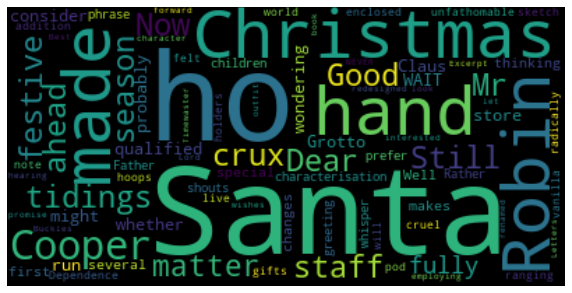

In [97]:
word_cloud = WordCloud().generate(email_body)
plt.figure(figsize = (10 , 7))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [98]:
example_noble = nltk.corpus.gutenberg.words('melville-moby_dick.txt')
len(example_noble)

260819

In [99]:
type(example_noble)

nltk.corpus.reader.util.StreamBackedCorpusView

In [100]:
example_noble

['[', 'Moby', 'Dick', 'by', 'Herman', 'Melville', ...]

In [101]:
word_list = [''.join(word) for word in example_noble]
noble_string = ' '.join(word_list)

In [102]:
noble_string

'[ Moby Dick by Herman Melville 1851 ] ETYMOLOGY . ( Supplied by a Late Consumptive Usher to a Grammar School ) The pale Usher -- threadbare in coat , heart , body , and brain ; I see him now . He was ever dusting his old lexicons and grammars , with a queer handkerchief , mockingly embellished with all the gay flags of all the known nations of the world . He loved to dust his old grammars ; it somehow mildly reminded him of his mortality . " While you take in hand to school others , and to teach them by what name a whale - fish is to be called in our tongue leaving out , through ignorance , the letter H , which almost alone maketh the signification of the word , you deliver that which is not true ." -- HACKLUYT " WHALE . ... Sw . and Dan . HVAL . This animal is named from roundness or rolling ; for in Dan . HVALT is arched or vaulted ." -- WEBSTER \' S DICTIONARY " WHALE . ... It is more immediately from the Dut . and Ger . WALLEN ; A . S . WALW - IAN , to roll , to wallow ." -- RICHA

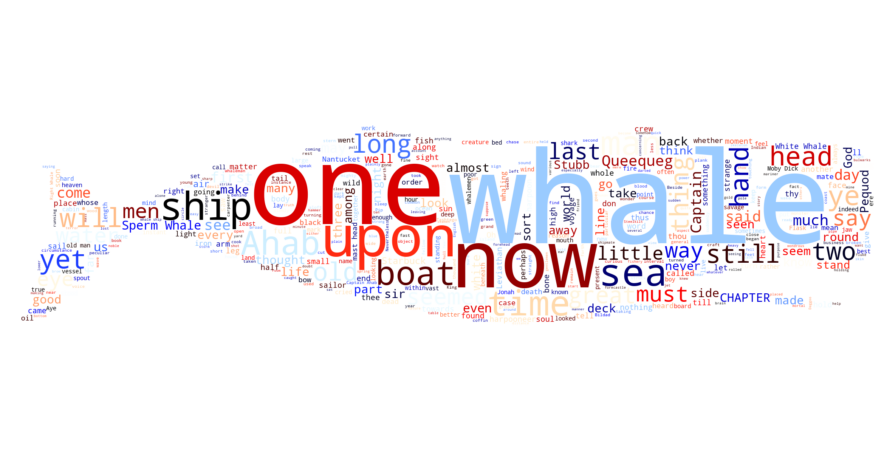

In [103]:
# make whale with wordcloud
icon = Image.open(WHALE_FILE)
image_mask = Image.new(mode='RGB', size=icon.size, color=(255, 255, 255))
image_mask.paste(icon, box=icon)

rgb_array = np.array(image_mask) # converts the image object to an array

word_cloud = WordCloud(mask=rgb_array, background_color='white', max_font_size = 300 , 
                      max_words=450, colormap='flag')

word_cloud.generate(noble_string)

plt.figure(figsize=[16, 8])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

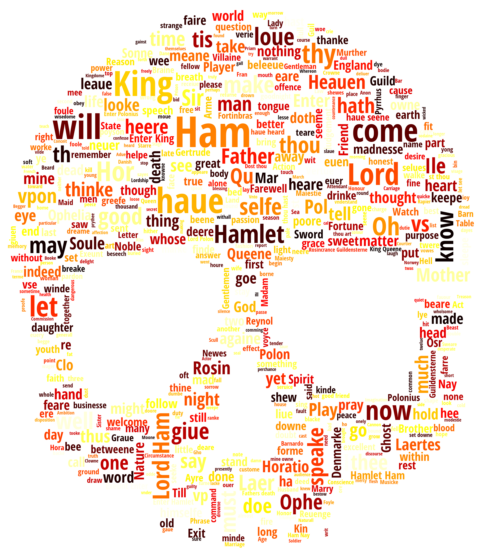

In [104]:
# make skull with wordcloud
hamlet_corpus = nltk.corpus.gutenberg.words('shakespeare-hamlet.txt')
word_list = [''.join(word) for word in hamlet_corpus]
hamlet_as_string = ' '.join(word_list)


icon = Image.open(SKULL_FILE)
image_mask = Image.new(mode='RGB', size=icon.size, color=(255, 255, 255))
image_mask.paste(icon, box=icon)

rgb_array = np.array(image_mask) # converts the image object to an array

word_cloud = WordCloud(mask=rgb_array, background_color='white', 
                      max_words=580, colormap='hot' , font_path=CUSTOM_FONT_FILE)

word_cloud.generate(hamlet_as_string)

plt.figure(figsize=[20, 10])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Word cloud of ham and spam emails

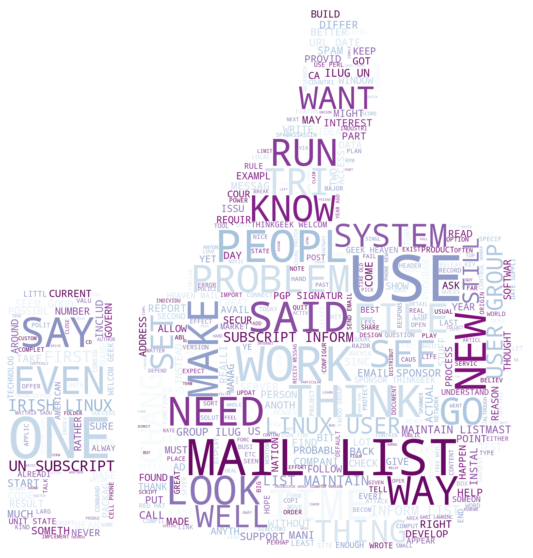

In [105]:
# make ham thumbs-up with wordcloud
icon = Image.open(THUMBS_UP_FILE)
image_mask = Image.new(mode='RGB', size=icon.size, color=(255, 255, 255))
image_mask.paste(icon, box=icon)

rgb_array = np.array(image_mask) # converts the image object to an array

word_cloud = WordCloud(mask=rgb_array, background_color='white', 
                      max_words=450, colormap='BuPu')

ham_str = ' '.join(flat_list_ham)

word_cloud.generate(ham_str.upper())

plt.figure(figsize=[20, 10])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

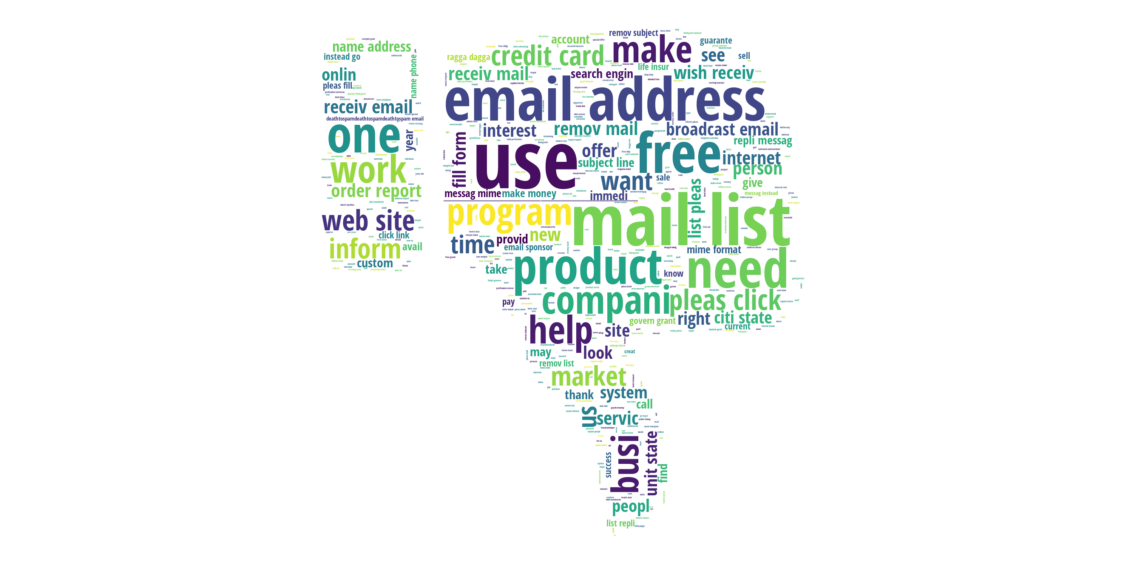

In [106]:
# make spam thumbs-down with wordcloud
icon = Image.open(THUMBS_DOWN_FILE)
image_mask = Image.new(mode='RGB', size=icon.size, color=(255, 255, 255))
image_mask.paste(icon, box=icon)

rgb_array = np.array(image_mask) # converts the image object to an array

word_cloud = WordCloud(mask=rgb_array, background_color='white', 
                      max_words=450, colormap='viridis' , font_path = CUSTOM_FONT_FILE)

spam_str = ' '.join(flat_list_spam)

word_cloud.generate(spam_str)

plt.figure(figsize=[20, 12])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Generate Vocabulary

In [107]:
stemed_nested_list = dataset.MESSAGE.apply(remove_html)

In [108]:
stemed_nested_list

ID
0       [save, life, insur, spend, life, quot, save, g...
1       [fight, risk, cancer, http, slim, guarante, lo...
2       [fight, risk, cancer, http, slim, guarante, lo...
3       [adult, club, offer, free, membership, instant...
4       [thought, might, like, slim, guarante, lose, l...
                              ...                        
5791    [http, bizarr, collect, stuf, anim, could, fet...
5792    [care, use, one, also, realli, cute, thing, ja...
5793    [sm, skip, montanaro, write, jeremi, put, anot...
5794    [mark, hammond, like, given, zodb, sound, attr...
5795    [hi, probabl, use, whatsoev, also, problem, re...
Name: MESSAGE, Length: 5796, dtype: object

In [109]:
flat_stemed_list = [item for subset in stemed_nested_list for item in subset]

In [110]:
unique_words = pd.Series(flat_stemed_list).value_counts()
print('No of unique words: ' , unique_words.shape[0])
unique_words.head()

No of unique words:  27305


http     10662
use       5017
list      4852
email     4370
get       4187
dtype: int64

In [111]:
frequent_words = unique_words[0:2500]
print(frequent_words)

http          10662
use            5017
list           4852
email          4370
get            4187
              ...  
maxaman          44
mutual           44
shoot            44
hook             44
telecommun       44
Length: 2500, dtype: int64


In [112]:
type(frequent_words) 

pandas.core.series.Series

#### Create vocabulary

In [113]:
words_id = list(range(0 , 2500))
vocab = pd.DataFrame({'Vocab_word': frequent_words.index.values} , index = words_id)

In [114]:
vocab

,Vocab_word
0,http
1,use
2,list
3,email
4,get
...,...
2495,maxaman
2496,mutual
2497,shoot
2498,hook


In [115]:
vocab.index.name = 'Word_id'
vocab.head()

,Vocab_word
Word_id,
0,http
1,use
2,list
3,email
4,get


Now make a csv file with this vocabulary.


In [116]:
# make csv file
vocab.to_csv(WORD_ID_FILE , index_label = vocab.index.name , header = vocab.Vocab_word.name)

In [117]:
any(vocab.Vocab_word == 'limon')

False

In [118]:
'Nothing' in set(vocab.Vocab_word)

False

In [119]:
clean_email_lengths = []
for sublist in stemed_nested_list:
    clean_email_lengths.append(len(sublist))

In [120]:
# Python List Comprehension
clean_email_lengths = [len(sublist) for sublist in stemed_nested_list]
print('No of words in the longest email:', max(clean_email_lengths))

No of words in the longest email: 7671


In [121]:
print('Email position in the list (and the data dataframe)', np.argmax(clean_email_lengths))

Email position in the list (and the data dataframe) 5775


In [122]:
stemed_nested_list[np.argmax(clean_email_lengths)]

['yahoo',
 'group',
 'sponsor',
 'dvd',
 'free',
 'p',
 'join',
 'http',
 'new',
 'version',
 'unison',
 'avail',
 'test',
 'incorpor',
 'sever',
 'small',
 'improv',
 'main',
 'chang',
 'fix',
 'bug',
 'potenti',
 'seriou',
 'safeti',
 'consequ',
 'small',
 'number',
 'user',
 'habit',
 'run',
 'one',
 'instanc',
 'unison',
 'time',
 'parallel',
 'user',
 'strongli',
 'encourag',
 'upgrad',
 'other',
 'wait',
 'wish',
 'releas',
 'includ',
 'execut',
 'linux',
 'solari',
 'window',
 'look',
 'maintain',
 'moment',
 'none',
 'activ',
 'develop',
 'regularli',
 'use',
 'unison',
 'window',
 'machin',
 'configur',
 'properli',
 'build',
 'execut',
 'export',
 'grab',
 'http',
 'enjoy',
 'benjamin',
 'chang',
 'sinc',
 'ad',
 'prefer',
 'maxthread',
 'use',
 'limit',
 'number',
 'simultan',
 'file',
 'transfer',
 'ad',
 'backupdir',
 'prefer',
 'control',
 'backup',
 'file',
 'store',
 'basic',
 'support',
 'ad',
 'osx',
 'particular',
 'unison',
 'recogn',
 'one',
 'host',
 'synchron',
 

In [123]:
dataset.at[np.argmax(clean_email_lengths), 'MESSAGE']

'------------------------ Yahoo! Groups Sponsor ---------------------~-->\n\n4 DVDs Free +s&p Join Now\n\nhttp://us.click.yahoo.com/pt6YBB/NXiEAA/Ey.GAA/26EolB/TM\n\n---------------------------------------------------------------------~->\n\n\n\nA new version of unison is now available for testing.  It incorporates\n\nseveral small improvements over 2.9.1, but the main change is a fix to\n\na bug that had potentially serious safety consequences, but only for\n\nthe very small number of users that are in the habit of running more\n\nthan one instance of Unison at a time, in parallel.  These users are\n\nstrongly encouraged to upgrade.  Others can wait if they wish.\n\n\n\nThe release includes pre-built executables for Linux and Solaris, but\n\nnot Windows.  (We are looking for a Unison-Windows maintainer -- at\n\nthe moment, none of the active developers are regularly using Unison\n\non Windows, and we do not have a machine that is configured properly\n\nfor building executables for exp

## Generate Features & Sparse Matrix

which words are not occurance more than one time,we will remove those words.That is the main function of Sparse-matrix

In [124]:
stemed_nested_list

ID
0       [save, life, insur, spend, life, quot, save, g...
1       [fight, risk, cancer, http, slim, guarante, lo...
2       [fight, risk, cancer, http, slim, guarante, lo...
3       [adult, club, offer, free, membership, instant...
4       [thought, might, like, slim, guarante, lose, l...
                              ...                        
5791    [http, bizarr, collect, stuf, anim, could, fet...
5792    [care, use, one, also, realli, cute, thing, ja...
5793    [sm, skip, montanaro, write, jeremi, put, anot...
5794    [mark, hammond, like, given, zodb, sound, attr...
5795    [hi, probabl, use, whatsoev, also, problem, re...
Name: MESSAGE, Length: 5796, dtype: object

In [125]:
word_to_list = pd.DataFrame.from_records(stemed_nested_list.tolist())
word_to_list.head(10)

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
0,save,life,insur,spend,life,quot,save,g,famili,financi,...,None,None,None,None,None,None,None,None,None,None
1,fight,risk,cancer,http,slim,guarante,lose,lb,day,http,...,None,None,None,None,None,None,None,None,None,None
2,fight,risk,cancer,http,slim,guarante,lose,lb,day,http,...,None,None,None,None,None,None,None,None,None,None
3,adult,club,offer,free,membership,instant,access,site,user,name,...,None,None,None,None,None,None,None,None,None,None
4,thought,might,like,slim,guarante,lose,lb,day,http,fight,...,None,None,None,None,None,None,None,None,None,None
5,powerhous,gift,program,want,miss,get,founder,major,player,one,...,None,None,None,None,None,None,None,None,None,None
6,help,want,year,old,fortun,compani,grow,tremend,rate,look,...,None,None,None,None,None,None,None,None,None,None
7,reliaquot,save,life,insur,life,chang,instant,import,protect,famili,...,None,None,None,None,None,None,None,None,None,None
8,tire,bull,want,stop,lose,money,want,real,money,maker,...,None,None,None,None,None,None,None,None,None,None
9,dear,cost,effect,direct,email,advertis,promot,busi,low,per,...,None,None,None,None,None,None,None,None,None,None


In [126]:
word_to_list.shape

(5796, 7671)

we have 7671 columns because the longest email have 7671 words.

Now spliting the dataset into train and test.

### Spliting into train and test

In [127]:
x_train ,  x_test , y_train , y_test = train_test_split(word_to_list , dataset.CATEGORY ,  test_size = 0.30 , random_state = 30)

In [128]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
3976,url,http,date,lo,angel,long,enough,read,sentenc,chanc,...,None,None,None,None,None,None,None,None,None,None
596,substanti,increas,sale,easili,accept,major,credit,card,right,away,...,None,None,None,None,None,None,None,None,None,None
809,messag,transfer,trial,version,communig,tm,miss,news,weekend,busi,...,None,None,None,None,None,None,None,None,None,None
2050,normal,never,buy,xbox,iol,shop,larg,compani,make,loss,...,None,None,None,None,None,None,None,None,None,None
4998,vipul,ask,question,spamnet,hope,simpl,question,defin,spamnet,see,...,None,None,None,None,None,None,None,None,None,None


In [129]:
y_train.head()

ID
3976    0
596     1
809     1
2050    0
4998    0
Name: CATEGORY, dtype: int64

In [130]:
x_train.index.name = 'ID'
x_test.index.name = 'ID'
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
ID,,,,,,,,,,,,,,,,,,,,,
3976,url,http,date,lo,angel,long,enough,read,sentenc,chanc,...,None,None,None,None,None,None,None,None,None,None
596,substanti,increas,sale,easili,accept,major,credit,card,right,away,...,None,None,None,None,None,None,None,None,None,None
809,messag,transfer,trial,version,communig,tm,miss,news,weekend,busi,...,None,None,None,None,None,None,None,None,None,None
2050,normal,never,buy,xbox,iol,shop,larg,compani,make,loss,...,None,None,None,None,None,None,None,None,None,None
4998,vipul,ask,question,spamnet,hope,simpl,question,defin,spamnet,see,...,None,None,None,None,None,None,None,None,None,None


In [131]:
x_test.head()

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
ID,,,,,,,,,,,,,,,,,,,,,
3806,url,http,date,wed,sep,gmt,img,http,pictur,name,...,None,None,None,None,None,None,None,None,None,None
739,promot,product,servic,million,today,market,bulk,make,money,fast,...,None,None,None,None,None,None,None,None,None,None
4465,juli,niall,said,lot,benefit,use,hard,link,sort,reason,...,None,None,None,None,None,None,None,None,None,None
2891,updat,scan,cach,menu,entri,rescan,folder,similar,short,script,...,None,None,None,None,None,None,None,None,None,None
4614,fri,aug,hunt,bryan,mention,knock,dell,gener,next,machin,...,None,None,None,None,None,None,None,None,None,None


#### create sparse matrix using training data

In [132]:
word_index = pd.Index(vocab.Vocab_word)
word_index

Index(['http', 'use', 'list', 'email', 'get', 'mail', 'one', 'free', 'time',
       'work',
       ...
       'navig', 'subsequ', 'trader', 'ratak', 'distributor', 'maxaman',
       'mutual', 'shoot', 'hook', 'telecommun'],
      dtype='object', name='Vocab_word', length=2500)

In [133]:
word_index[2]

'list'

In [134]:
word_index.get_loc('thu')

395

In [135]:
def make_sparse_matrix(df, indexed_words, labels):
    """
    df: A dataframe with words in the columns with a document id as an index (X_train or X_test)
    indexed_words: index of words ordered by word id
    labels: category as a series (y_train or y_test)
    """
    
    nr_rows = df.shape[0]
    nr_cols = df.shape[1]
    
    word_set = set(indexed_words)
    dict_list = []
    
    for i in range(nr_rows):
        for j in range(nr_cols):
            
            word = df.iat[i, j]
            if word in word_set:
                doc_id = df.index[i]
                word_id = indexed_words.get_loc(word)
                category = labels.at[doc_id]
                
                item = {'LABEL': category, 'DOC_ID': doc_id,
                       'OCCURENCE': 1, 'WORD_ID': word_id}
                
                dict_list.append(item)
    
    return pd.DataFrame(dict_list)

In [136]:
%%time
sparse_train_df = make_sparse_matrix(x_train , word_index , y_train)

Wall time: 5min 1s


In [137]:
sparse_train_df.head(15)

,LABEL,DOC_ID,OCCURENCE,WORD_ID
0,0,3976,1,109
1,0,3976,1,0
2,0,3976,1,76
3,0,3976,1,1730
4,0,3976,1,2481
5,0,3976,1,186
6,0,3976,1,375
7,0,3976,1,120
8,0,3976,1,2332
9,0,3976,1,801


In [138]:
sparse_train_df.shape

(436466, 4)

Now combine everything with groupby method.

In [139]:
train_group = sparse_train_df.groupby(['DOC_ID' , 'WORD_ID' , 'LABEL']).sum()
train_group.head()

OCCURENCE
DOC_ID WORD_ID LABEL           
0      2       1              1
       3       1              2
       4       1              1
       7       1              3
       11      1              1

In [140]:
dataset.MESSAGE[0]

'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN">\n\n<HTML><HEAD>\n\n<META content=3D"text/html; charset=3Dwindows-1252" http-equiv=3DContent-T=\n\nype>\n\n<META content=3D"MSHTML 5.00.2314.1000" name=3DGENERATOR></HEAD>\n\n<BODY><!-- Inserted by Calypso -->\n\n<TABLE border=3D0 cellPadding=3D0 cellSpacing=3D2 id=3D_CalyPrintHeader_ r=\n\nules=3Dnone \n\nstyle=3D"COLOR: black; DISPLAY: none" width=3D"100%">\n\n  <TBODY>\n\n  <TR>\n\n    <TD colSpan=3D3>\n\n      <HR color=3Dblack noShade SIZE=3D1>\n\n    </TD></TR></TD></TR>\n\n  <TR>\n\n    <TD colSpan=3D3>\n\n      <HR color=3Dblack noShade SIZE=3D1>\n\n    </TD></TR></TBODY></TABLE><!-- End Calypso --><!-- Inserted by Calypso=\n\n --><FONT \n\ncolor=3D#000000 face=3DVERDANA,ARIAL,HELVETICA size=3D-2><BR></FONT></TD><=\n\n/TR></TABLE><!-- End Calypso --><FONT color=3D#ff0000 \n\nface=3D"Copperplate Gothic Bold" size=3D5 PTSIZE=3D"10">\n\n<CENTER>Save up to 70% on Life Insurance.</CENTER></FONT><FONT color=3D#ff=\n\n0000

'http' occurs twice because in the above message we can see that http appears twice.so that the count is 2 for http.

In [141]:
train_group = train_group.reset_index()
train_group.head(10)

,DOC_ID,WORD_ID,LABEL,OCCURENCE
0,0,2,1,1
1,0,3,1,2
2,0,4,1,1
3,0,7,1,3
4,0,11,1,1
5,0,15,1,1
6,0,18,1,2
7,0,19,1,2
8,0,23,1,1
9,0,26,1,2


In [142]:
train_group.shape

(262219, 4)

In [143]:
train_group.isnull().sum()

DOC_ID       0
WORD_ID      0
LABEL        0
OCCURENCE    0
dtype: int64

save the file in text format.

In [144]:
np.savetxt(TRAINING_DATA_FILE , train_group , fmt='%d')

In [145]:
train_group.columns

Index(['DOC_ID', 'WORD_ID', 'LABEL', 'OCCURENCE'], dtype='object')

Now do the same work for x_test data

In [146]:
x_test.shape

(1739, 7671)

In [147]:
%%time
sparse_test_df = make_sparse_matrix(x_test , word_index , y_test)

Wall time: 1min 41s


In [148]:
sparse_test_df.shape

(197667, 4)

In [149]:
test_group = sparse_test_df.groupby(['DOC_ID', 'WORD_ID', 'LABEL']).sum().reset_index()
test_group.head()

,DOC_ID,WORD_ID,LABEL,OCCURENCE
0,1,0,1,7
1,1,1,1,1
2,1,2,1,2
3,1,4,1,1
4,1,7,1,1


In [150]:
np.savetxt(TEST_DATA_FILE , test_group, fmt='%d')

## Pre-Processing Subtleties

In [151]:
train_doc_ids = set(train_group.DOC_ID)
test_doc_ids = set(test_group.DOC_ID)

In [152]:
len(test_doc_ids)

1724

In [153]:
set(x_test.index.values) - test_doc_ids # Excluded emails after pre-processing

{73, 86, 205, 298, 439, 471, 765, 924, 940, 945, 965, 983, 988, 1544, 1878}

Some index are missing from the original test data and our pre-processed data.

In [154]:
dataset.loc[14]

MESSAGE      <HTML><HEAD><TITLE>Lowest Rate Services</TITLE...
CATEGORY                                                     1
File_Name               00015.048434ab64c86cf890eda1326a5643f5
Name: 14, dtype: object

In [155]:
remove_html(dataset.at[14, 'MESSAGE'])

['lowest',
 'rate',
 'servic',
 'conferenc',
 'easi',
 'cent',
 'per',
 'minut',
 'includ',
 'long',
 'distanc',
 'setup',
 'fee',
 'contract',
 'monthli',
 'fee',
 'call',
 'anytim',
 'anywher',
 'anywher',
 'connect',
 'particip',
 'simplic',
 'set',
 'administr',
 'oper',
 'help',
 'avail',
 'highest',
 'qualiti',
 'servic',
 'lowest',
 'rate',
 'industri',
 'fill',
 'form',
 'low',
 'find',
 'lower',
 'phone',
 'bill',
 'everi',
 'requir',
 'input',
 'web',
 'address',
 'compani',
 'busi',
 'home',
 'phone',
 'email',
 'type',
 'busi',
 'remov',
 'distribut',
 'list',
 'pleas',
 'click']

In [156]:
dataset.MESSAGE[1096]

'Dear fellow eBay user,\n\n\n\nI listed this CD on eBay a few months ago and here\'s \n\nwhat happened.  I got an email from Safeharbor saying \n\nthat all my auctions had been cancelled and that the CD \n\nwas permanently "banned" from being sold on eBay.  From \n\nthen on, I called it the "Banned CD"!\n\n\n\nSo why did eBay ban it?  Maybe they figured you shouldn\'t \n\nhave access to this type of information, or maybe they \n\ndidn\'t think we could cram all of these programs onto \n\none CD Rom.  I\'ll let you decide.\n\n\n\nThis CD will teach you things that eBay, Uncle Sam, and \n\nothers just don\'t want you to know.  I am not responsible \n\nfor how you use some of this information and it is \n\nprovided for educational purposes only.  Here are just a \n\nfew of the things you will learn ...\n\n\n\n*** Find confidential info on anyone in 30 minutes or \n\nless on the Internet.  \n\n\n\n    You\'ll be able to track down your old flame, find \n\n    out how much money your ex is 

we can see why the problem is occured.This can be happen for imputing wrong encoding or may be other problem.

In [157]:
remove_html(dataset.at[1096, 'MESSAGE'])

['dear',
 'fellow',
 'ebay',
 'user',
 'list',
 'cd',
 'ebay',
 'month',
 'ago',
 'happen',
 'got',
 'email',
 'safeharbor',
 'say',
 'auction',
 'cancel',
 'cd',
 'perman',
 'ban',
 'sold',
 'ebay',
 'call',
 'ban',
 'cd',
 'ebay',
 'ban',
 'mayb',
 'figur',
 'access',
 'type',
 'inform',
 'mayb',
 'think',
 'could',
 'cram',
 'program',
 'onto',
 'one',
 'cd',
 'rom',
 'let',
 'decid',
 'cd',
 'teach',
 'thing',
 'ebay',
 'uncl',
 'sam',
 'other',
 'want',
 'know',
 'respons',
 'use',
 'inform',
 'provid',
 'educ',
 'purpos',
 'thing',
 'learn',
 'find',
 'confidenti',
 'info',
 'anyon',
 'minut',
 'less',
 'internet',
 'abl',
 'track',
 'old',
 'flame',
 'find',
 'much',
 'money',
 'ex',
 'hide',
 'bank',
 'account',
 'run',
 'background',
 'check',
 'proespect',
 'client',
 'employe',
 'even',
 'govern',
 'agenc',
 'troubl',
 'obtain',
 'much',
 'inform',
 'resourc',
 'profession',
 'investig',
 'right',
 'fingertip',
 'home',
 'comput',
 'list',
 'compani',
 'issu',
 'colleg',
 'd

In [158]:
dataset.MESSAGE[1096]

'Dear fellow eBay user,\n\n\n\nI listed this CD on eBay a few months ago and here\'s \n\nwhat happened.  I got an email from Safeharbor saying \n\nthat all my auctions had been cancelled and that the CD \n\nwas permanently "banned" from being sold on eBay.  From \n\nthen on, I called it the "Banned CD"!\n\n\n\nSo why did eBay ban it?  Maybe they figured you shouldn\'t \n\nhave access to this type of information, or maybe they \n\ndidn\'t think we could cram all of these programs onto \n\none CD Rom.  I\'ll let you decide.\n\n\n\nThis CD will teach you things that eBay, Uncle Sam, and \n\nothers just don\'t want you to know.  I am not responsible \n\nfor how you use some of this information and it is \n\nprovided for educational purposes only.  Here are just a \n\nfew of the things you will learn ...\n\n\n\n*** Find confidential info on anyone in 30 minutes or \n\nless on the Internet.  \n\n\n\n    You\'ll be able to track down your old flame, find \n\n    out how much money your ex is 

After removing the html

## Training the Model

In [159]:
#import train data
sparse_train_data = np.loadtxt(TRAINING_DATA_FILE , delimiter = ' ' , dtype = int)

In [160]:
sparse_train_data.shape

(262219, 4)

In [161]:
sparse_train_data[:5]

array([[ 0,  2,  1,  1],
       [ 0,  3,  1,  2],
       [ 0,  4,  1,  1],
       [ 0,  7,  1,  3],
       [ 0, 11,  1,  1]])

In [162]:
sparse_train_data[-5:]

array([[5795, 2051,    0,    1],
       [5795, 2053,    0,    2],
       [5795, 2298,    0,    1],
       [5795, 2360,    0,    1],
       [5795, 2434,    0,    1]])

In [163]:
# import the test data
sparse_test_data = np.loadtxt(TEST_DATA_FILE , delimiter = ' ' , dtype = int)

In [164]:
sparse_test_data.shape

(113723, 4)

In [165]:
sparse_test_data[:5]

array([[1, 0, 1, 7],
       [1, 1, 1, 1],
       [1, 2, 1, 2],
       [1, 4, 1, 1],
       [1, 7, 1, 1]])

In [166]:
print('No of unique emails in train data: ' , np.unique(sparse_train_data[:,0]).size)

No of unique emails in train data:  4015


In [167]:
print('No of unique emails in test data: ' , np.unique(sparse_test_data[:,0]).size)

No of unique emails in test data:  1724


In [168]:
column_names = ['DOC_ID'] + ['CATEGORY'] + list(range(0, VOCAB_SIZE))
column_names[:5]

['DOC_ID', 'CATEGORY', 0, 1, 2]

In [169]:
len(column_names)

2502

In [170]:
index_names = np.unique(sparse_train_data[:, 0])
index_names

array([   0,    2,    3, ..., 5793, 5794, 5795])

In [171]:
full_train_data = pd.DataFrame(index=index_names, columns=column_names)
full_train_data.fillna(value=0 , inplace = True)

In [172]:
full_train_data.head(10)

,DOC_ID,CATEGORY,0,1,2,3,4,5,6,7,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Create full matrix from a sparse matrix

In [173]:
def make_full_matrix(sparse_matrix, nr_words, doc_idx=0, word_idx=1, cat_idx=2, freq_idx=3):

    column_names = ['DOC_ID'] + ['CATEGORY'] + list(range(0, VOCAB_SIZE))
    doc_id_names = np.unique(sparse_matrix[:, 0])
    full_matrix = pd.DataFrame(index=doc_id_names, columns=column_names)
    full_matrix.fillna(value=0, inplace=True)
    
    for i in range(sparse_matrix.shape[0]):
        doc_nr = sparse_matrix[i][doc_idx]
        word_id = sparse_matrix[i][word_idx]
        label = sparse_matrix[i][cat_idx]
        occurrence = sparse_matrix[i][freq_idx]
        
        full_matrix.at[doc_nr , 'DOC_ID'] = doc_nr
        full_matrix.at[doc_nr , 'CATEGORY'] = label
        full_matrix.at[doc_nr , word_id] = occurrence
    
    full_matrix.set_index('DOC_ID' , inplace = True)
    
    return full_matrix

In [174]:
%%time
full_train_data = make_full_matrix(sparse_train_data , VOCAB_SIZE)

Wall time: 11.5 s


In [175]:
full_train_data.head(15)

,CATEGORY,0,1,2,3,4,5,6,7,8,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
DOC_ID,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,1,2,1,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
2,1,6,1,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,6,0,0,2,4,0,3,13,0,...,0,0,0,0,0,0,0,0,0,0
4,1,5,1,2,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,3,2,1,2,2,1,...,0,0,0,0,0,0,0,0,0,0
6,1,2,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,1,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1,3,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [176]:
full_train_data.tail(15)

,CATEGORY,0,1,2,3,4,5,6,7,8,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
DOC_ID,,,,,,,,,,,,,,,,,,,,,
5776,0,6,3,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5777,0,2,1,1,1,2,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5779,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5780,0,0,0,0,0,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5781,0,2,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5783,0,2,1,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5785,0,2,1,7,2,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5788,0,0,4,0,2,4,3,3,1,4,...,0,0,0,0,0,0,0,0,0,0


## Naive Bayes Model

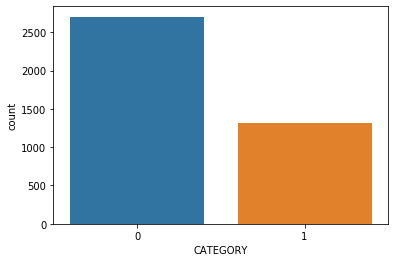

In [177]:
sns.countplot(x = 'CATEGORY' , data = full_train_data)

In [178]:
full_train_data.CATEGORY.value_counts()

0    2703
1    1312
Name: CATEGORY, dtype: int64

In [179]:
prob_spam = full_train_data.CATEGORY.sum() / full_train_data.CATEGORY.size
print('Probability of spam is', prob_spam)

Probability of spam is 0.32677459526774594


In [180]:
# total number of words
full_train_features = full_train_data.loc[:, full_train_data.columns != 'CATEGORY']
full_train_features.head()

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
DOC_ID,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,2,1,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,1,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,0,0,2,4,0,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,2,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,3,2,1,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0


In [181]:
email_lengths = full_train_features.sum(axis=1)
email_lengths.shape

(4015,)

In [182]:
email_lengths[:5]

DOC_ID
0     87
2     40
3    182
4     43
5    141
dtype: int64

In [183]:
total_wc = email_lengths.sum()
total_wc

436466

we have 436491 words.

In [184]:
spam_lengths = email_lengths[full_train_data.CATEGORY == 1]
spam_lengths.shape

(1312,)

In [185]:
spam_wc = spam_lengths.sum()
spam_wc

194608

In [186]:
ham_lengths = email_lengths[full_train_data.CATEGORY == 0]
ham_lengths.shape

(2703,)

In [187]:
email_lengths.shape[0] - spam_lengths.shape[0] - ham_lengths.shape[0]

0

In [188]:
nonspam_wc = ham_lengths.sum()
nonspam_wc

241858

In [189]:
spam_wc + nonspam_wc - total_wc

0

In [190]:
print('Average no. of words in spam emails {:.3f}'.format(spam_wc / spam_lengths.shape[0]))
print('Average no. of words in ham emails {:.3f}'.format(nonspam_wc / ham_lengths.shape[0]))

Average no. of words in spam emails 148.329
Average no. of words in ham emails 89.478


#### Tokens Occuring in Spam

In [191]:
full_train_features.shape

(4015, 2500)

In [192]:
train_spam_tokens = full_train_features.loc[full_train_data.CATEGORY == 1]
train_spam_tokens.head()

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
DOC_ID,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,2,1,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,1,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,0,0,2,4,0,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,2,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,3,2,1,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0


In [193]:
train_spam_tokens.shape

(1312, 2500)

In [194]:
# Laplace smothing
summed_spam_tokens = train_spam_tokens.sum(axis=0) + 1 ### Laplace smothing
summed_spam_tokens.shape

(2500,)

In [195]:
summed_spam_tokens.tail()

2495    45
2496    23
2497     5
2498     6
2499    26
dtype: int64

#### Tokens occuring in ham

In [196]:
train_ham_tokens = full_train_features.loc[full_train_data.CATEGORY == 0]
summed_ham_tokens = train_ham_tokens.sum(axis=0) + 1

In [197]:
summed_ham_tokens.shape

(2500,)

In [198]:
train_ham_tokens[2499].sum() + 1

10

#### P(Token | Spam) - Probability that a Token Occurs given the Email is Spam

In [199]:
prob_tokens_spam = summed_spam_tokens / (spam_wc + VOCAB_SIZE)
prob_tokens_spam[:5]

0    0.011785
1    0.004896
2    0.007255
3    0.011572
4    0.006215
dtype: float64

In [200]:
prob_tokens_spam.sum()

1.0

#### P(Token | Ham) - Probability that a Token Occurs given the Email is Nonspam

In [201]:
prob_tokens_nonspam = summed_ham_tokens / (nonspam_wc + VOCAB_SIZE)
prob_tokens_nonspam.sum()

1.0

#### P(Token) - Probability that Token Occurs 

In [202]:
prob_tokens_all = full_train_features.sum(axis=0) / total_wc

In [203]:
prob_tokens_all.sum()

1.0

In [204]:
# Save the train model
np.savetxt(TOKEN_SPAM_PROB_FILE, prob_tokens_spam)
np.savetxt(TOKEN_HAM_PROB_FILE, prob_tokens_nonspam)
np.savetxt(TOKEN_ALL_PROB_FILE, prob_tokens_all)

## Prepare Test Data

In [205]:
sparse_test_data.shape

(113723, 4)

In [206]:
%%time
full_test_data = make_full_matrix(sparse_test_data , nr_words = VOCAB_SIZE)

Wall time: 5.41 s


In [207]:
X_test = full_test_data.loc[:, full_test_data.columns != 'CATEGORY']
y_test = full_test_data.CATEGORY

In [208]:
np.savetxt(TEST_TARGET_FILE , y_test)
np.savetxt(TEST_FEATURE_MATRIX , X_test)

### Load the dataset

In [209]:
# Features
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
# Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')

In [210]:
# Token Probabilities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE , delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE , delimiter=' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE , delimiter=' ')

In [211]:
X_test[:5]

array([[7., 1., 2., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 2., 1., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Calculating the Joint Probability

In [212]:
a = np.array([1, 2, 3])
b = np.array([0, 5, 4])
print('a = ', a)
print('b = ', b)

a =  [1 2 3]
b =  [0 5 4]


In [213]:
a.dot(b)

22

In [214]:
c = np.array([[0, 6], [3, 0], [5, 1]])
print('shape of c is', c.shape)
print(c)

shape of c is (3, 2)
[[0 6]
 [3 0]
 [5 1]]


In [215]:
print('shape of the dot product is ', X_test.dot(prob_token_spam).shape)

shape of the dot product is  (1724,)


In [216]:
PROB_SPAM = 0.3116

In [217]:
np.log(prob_token_spam)

array([ -4.44089235,  -5.31937898,  -4.92607736, ..., -10.58206917,
       -10.39974761,  -8.93341054])

In [218]:
prob_all_tokens

array([1.76164925e-02, 7.61571348e-03, 7.78525704e-03, ...,
       6.18604886e-05, 6.18604886e-05, 7.78983930e-05])

In [219]:
# joint probability in log format
#joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_all_tokens)) + np.log(PROB_SPAM)
joint_log_spam = X_test.dot((prob_token_spam) - (prob_all_tokens)) + (PROB_SPAM)

In [220]:
joint_log_spam

array([0.27170385, 0.40299573, 0.36888387, ..., 0.25626285, 0.29269206,
       0.2949573 ])

In [221]:
# joint probability in log format
#joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens)) + np.log(1 - PROB_SPAM)
joint_log_ham = X_test.dot((prob_token_ham) - (prob_all_tokens)) + (1 - PROB_SPAM)

In [222]:
print(joint_log_ham)

[0.71675491 0.6096641  0.63780206 ... 0.72775417 0.70222798 0.69994252]


In [223]:
joint_log_ham.size

1724

## Making Predictions

In [224]:
prediction = joint_log_spam > joint_log_ham

In [225]:
prediction[-5:]*1

array([0, 0, 0, 0, 0])

In [226]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

In [227]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1-PROB_SPAM)

In [228]:
joint_log_spam

array([ -358.63958811, -1223.77994887, -1485.05961012, ...,
        -876.32988879,  -289.12136098,  -202.92055542])

In [229]:
joint_log_ham

array([ -349.75149667, -1301.12050055, -1544.23204999, ...,
        -787.9147438 ,  -260.8890609 ,  -190.75896266])

## Accuracy

In [230]:
correct_docs = (y_test == prediction).sum()
print('Docs classified correctly', correct_docs)

Docs classified correctly 1220


In [231]:
numdocs_wrong = X_test.shape[0] - correct_docs
print('Docs classified incorrectly', numdocs_wrong)

Docs classified incorrectly 504


In [232]:
correct_docs/len(X_test)

0.7076566125290024

In [233]:
fraction_wrong = numdocs_wrong/len(X_test)
print('Fraction classified incorrectly is {:.2%}'.format(fraction_wrong))
print('Accuracy of the model is {:.2%}'.format(1-fraction_wrong))

Fraction classified incorrectly is 29.23%
Accuracy of the model is 70.77%


## Visualize the result

In [234]:
# Chart Styling Info
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'

linedata = np.linspace(start=-14000, stop=1, num=1000)

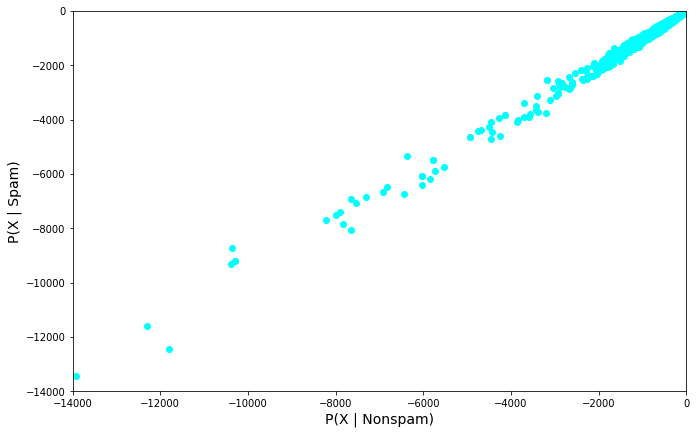

In [235]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham , joint_log_spam , color='cyan')
plt.show()

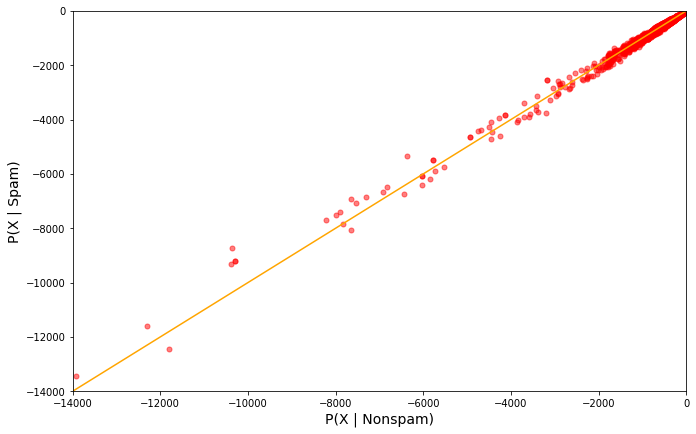

In [236]:
# plot the decision boundary
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='red', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

plt.show()

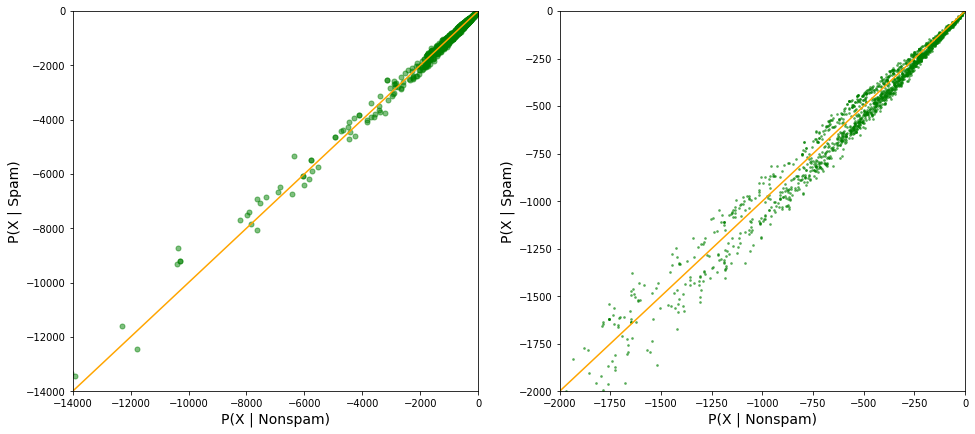

In [237]:
plt.figure(figsize=(16, 7))

# Chart Nr 1:
plt.subplot(1, 2, 1)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='green', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

# Chart Nr 2:
plt.subplot(1, 2, 2)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='green', alpha=0.5, s=3)
plt.plot(linedata, linedata, color='orange')

plt.show()

In [238]:
# Chart Styling
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham, 
                          labels: y_test})

C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


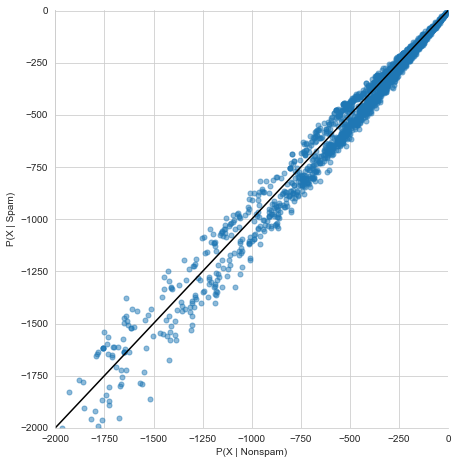

<Figure size 1080x1080 with 0 Axes>

In [239]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, size=6.5, fit_reg=False,
          scatter_kws={'alpha': 0.5, 's': 25})

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color='black')

plt.figure(figsize = (15,15))
plt.show();

C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


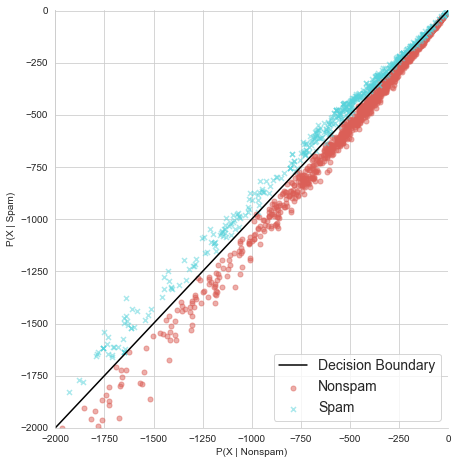

In [240]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, size=6.5, fit_reg=False, legend=False,
          scatter_kws={'alpha': 0.5, 's': 25}, hue=labels, markers=['o', 'x'], palette='hls')

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color='black')

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)

plt.show()

C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


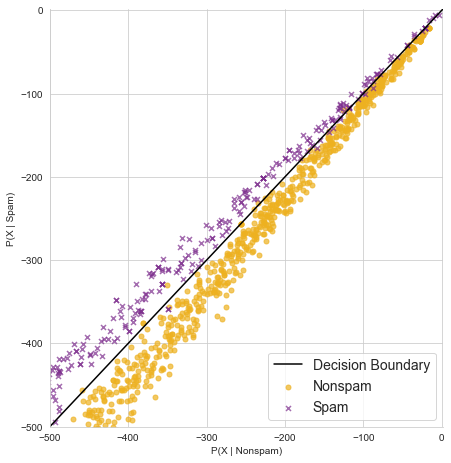

In [241]:
my_colours = ['#EDB120' , '#7E2F8E']

sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, size=6.5, fit_reg=False, legend=False,
          scatter_kws={'alpha': 0.7, 's': 25}, hue=labels, markers=['o', 'x'], palette=my_colours)

plt.xlim([-500, 1])
plt.ylim([-500, 1])

plt.plot(linedata, linedata, color='black')

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)

plt.show()

In [242]:
np.unique(prediction, return_counts=True)

(array([False,  True]), array([1699,   25], dtype=int64))

In [243]:
true_pos = (y_test == 1) & (prediction == 1)

In [244]:
true_pos.sum()

24

In [245]:
false_pos = (y_test == 0) & (prediction == 1)
false_pos.sum()

1

In [246]:
false_neg = (y_test == 1) & (prediction == 0)
false_neg.sum()

503

In [247]:
# Recall

recall_score = true_pos.sum() / (true_pos.sum() + false_neg.sum())
print('Recall score is {:.2%}'.format(recall_score))

Recall score is 4.55%


In [248]:
# Precision

precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())
print('Precision score is {:.3}'.format(precision_score))

Precision score is 0.96


In [249]:
# F1 score

f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
print('F Score is {:.2}'.format(f1_score))

F Score is 0.087


In [250]:
accuracy_score(y_test , prediction)

0.7076566125290024

In [251]:
confusion_matrix(y_test , prediction)

array([[1196,    1],
       [ 503,   24]], dtype=int64)

In [252]:
print(classification_report(y_test , prediction))

              precision    recall  f1-score   support

         0.0       0.70      1.00      0.83      1197
         1.0       0.96      0.05      0.09       527

    accuracy                           0.71      1724
   macro avg       0.83      0.52      0.46      1724
weighted avg       0.78      0.71      0.60      1724

